# THE SPARK FOUNDATION
### GRIP JAN2021
## TASK8:- Timeline Analysis : Covid-19
# BY:- NISHITH KUMAR

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the dataset

In [2]:
covid=pd.read_csv(r"C:\Users\HELLO\Favorites\Downloads\owid-covid-data.csv")  # convert data into dataframe

In [3]:
covid.head()   ## Showing first 5 values

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [4]:
covid.shape

(58948, 54)

In [5]:
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'new_vaccinations', 'total_vaccinations_per_hundred',
       'new_vaccinations_per_million', 'stringency_index', 'population',
    

In [6]:
covid["location"].value_counts()   # looking at different locations

Mexico              374
Argentina           374
Thailand            371
Taiwan              359
World               355
                   ... 
Solomon Islands      89
Marshall Islands     73
Hong Kong            71
Vanuatu              60
Samoa                52
Name: location, Length: 192, dtype: int64

In [7]:
covid.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,5.839000e+04,58383.000000,57428.000000,5.001100e+04,50010.000000,57428.000000,58053.000000,58046.000000,57096.000000,49687.000000,...,56109.000000,38438.000000,56697.000000,57349.000000,44776.000000,44163.000000,28368.000000,52106.000000,58310.000000,56356.000000
mean,2.850888e+05,3015.834061,2985.741408,9.528047e+03,76.520776,65.158653,4884.030930,56.178189,55.473352,125.411478,...,19203.868748,13.140465,256.075749,7.763847,10.577670,32.643342,51.159905,3.042798,73.145567,0.715884
std,2.791991e+06,26867.250438,26211.194936,7.562009e+04,560.693694,499.920818,9934.381817,161.374668,131.198900,233.889961,...,19675.209045,19.865784,117.990870,3.880823,10.417913,13.452246,31.774643,2.473251,7.547216,0.153731
min,1.000000e+00,-46076.000000,-1121.714000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,4.760000e+02,1.000000,4.143000,2.600000e+01,0.000000,0.000000,96.444000,0.061000,0.774000,4.549000,...,4541.795000,0.500000,164.905000,5.290000,1.900000,21.600000,20.859000,1.300000,67.440000,0.591000
50%,4.891000e+03,40.000000,49.143000,1.490000e+02,1.000000,0.714000,743.415000,4.543000,6.084000,23.111000,...,13111.214000,2.000000,241.219000,7.110000,6.300000,31.400000,49.839000,2.400000,74.620000,0.750000
75%,4.794950e+04,460.000000,496.286000,1.337500e+03,11.000000,8.000000,4628.118000,40.836250,45.299750,112.861000,...,27216.445000,18.900000,325.721000,10.080000,19.300000,41.100000,83.241000,4.000000,78.570000,0.843000
max,8.886050e+07,861748.000000,699052.429000,1.913419e+06,15512.000000,12253.286000,109868.634000,8652.658000,2648.773000,1885.792000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


In [8]:
covid.isna().any()

iso_code                               True
continent                              True
location                              False
date                                  False
total_cases                            True
new_cases                              True
new_cases_smoothed                     True
total_deaths                           True
new_deaths                             True
new_deaths_smoothed                    True
total_cases_per_million                True
new_cases_per_million                  True
new_cases_smoothed_per_million         True
total_deaths_per_million               True
new_deaths_per_million                 True
new_deaths_smoothed_per_million        True
reproduction_rate                      True
icu_patients                           True
icu_patients_per_million               True
hosp_patients                          True
hosp_patients_per_million              True
weekly_icu_admissions                  True
weekly_icu_admissions_per_millio

In [9]:
covid.isna().sum()

iso_code                                337
continent                               692
location                                  0
date                                      0
total_cases                             558
new_cases                               565
new_cases_smoothed                     1520
total_deaths                           8937
new_deaths                             8938
new_deaths_smoothed                    1520
total_cases_per_million                 895
new_cases_per_million                   902
new_cases_smoothed_per_million         1852
total_deaths_per_million               9261
new_deaths_per_million                 9262
new_deaths_smoothed_per_million        1852
reproduction_rate                     13953
icu_patients                          52819
icu_patients_per_million              52819
hosp_patients                         52081
hosp_patients_per_million             52081
weekly_icu_admissions                 58388
weekly_icu_admissions_per_millio

In [10]:
# covid cases in india

india=covid[covid["location"]=="India"]

In [11]:
india.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
23782,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
23783,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
23784,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
23785,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
23786,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64


In [12]:
india.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
24122,IND,Asia,India,2021-01-04,10356844.0,16375.0,18934.429,149850.0,201.0,242.429,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
24123,IND,Asia,India,2021-01-05,10374932.0,18088.0,18582.857,150114.0,264.0,239.286,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
24124,IND,Asia,India,2021-01-06,10395278.0,20346.0,18372.000,150336.0,222.0,228.286,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
24125,IND,Asia,India,2021-01-07,10413417.0,18139.0,20963.286,150570.0,234.0,261.714,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
24126,IND,Asia,India,2021-01-08,10413417.0,0.0,18101.143,150570.0,0.0,225.143,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64


### Data Visualization

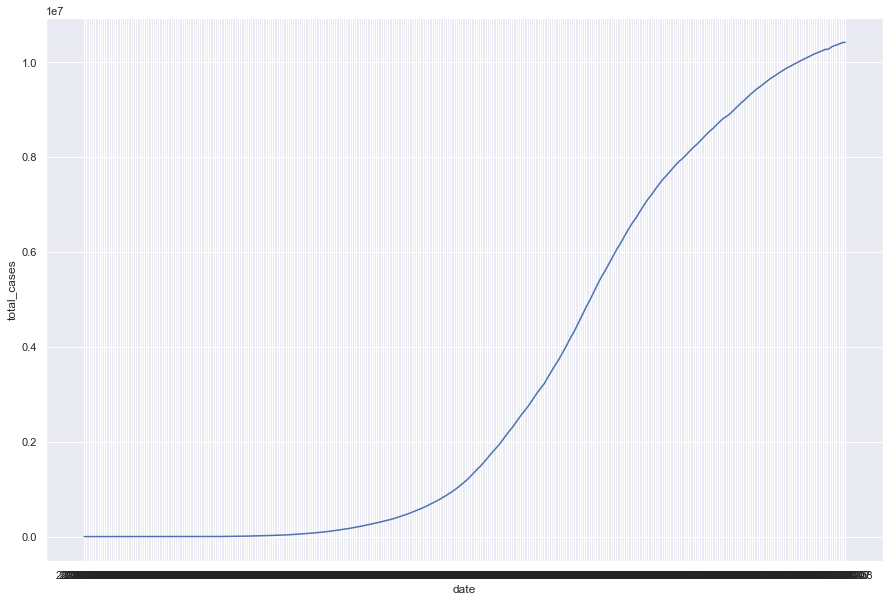

In [13]:
# total cases per day

sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=india)
plt.show()

In [14]:
india_last_5_days=india.tail()

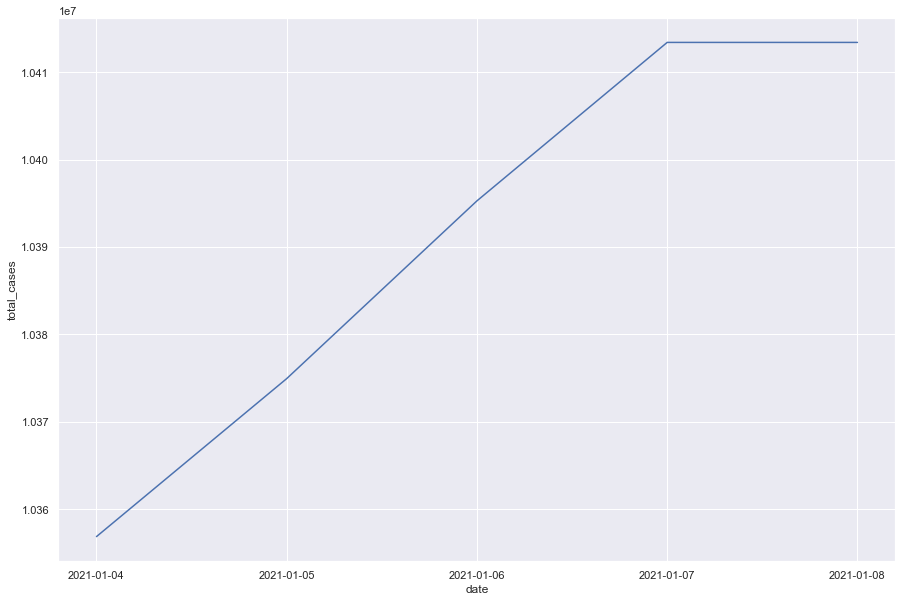

In [15]:
# total cases last 5 days

sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=india_last_5_days)
plt.show()

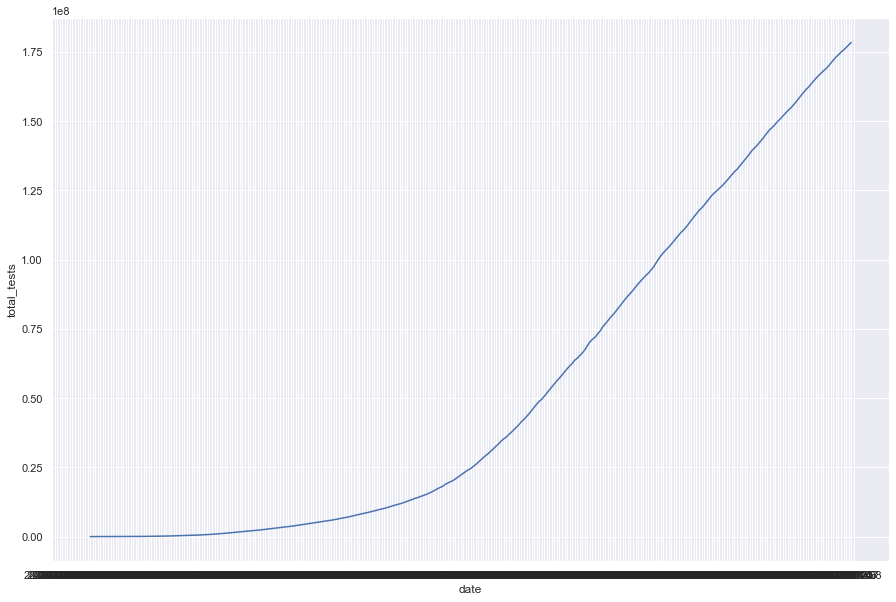

In [16]:
# total test per day

sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_tests",data=india)
plt.show()

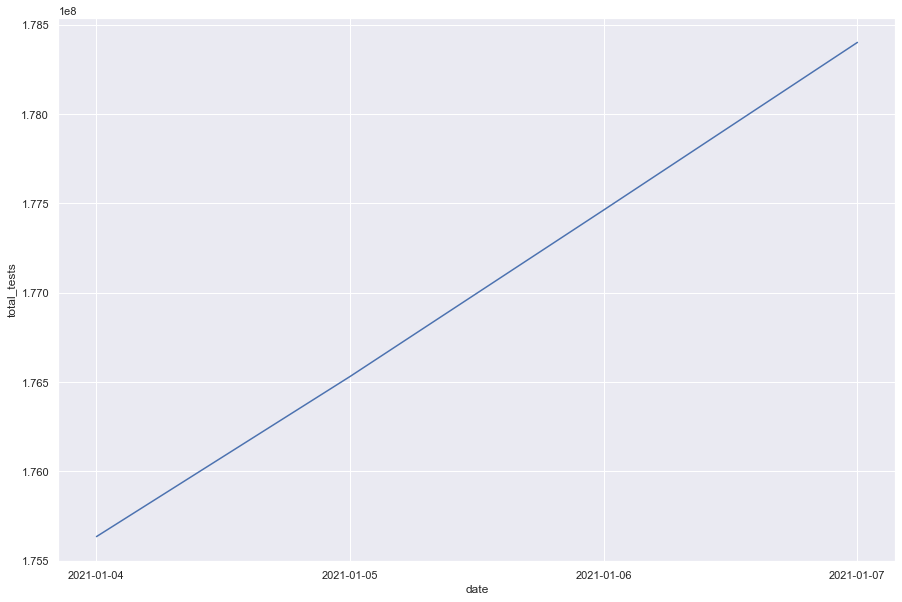

In [17]:
# total test last 5 days

sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_tests",data=india_last_5_days)
plt.show()

In [18]:
# covid cases in Brazil

brazil=covid[covid["location"]=="Brazil"]

In [19]:
brazil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
7210,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7211,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7212,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7213,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7214,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759


In [20]:
brazil.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
7523,BRA,South America,Brazil,2021-01-04,7753752.0,20006.0,35559.857,196561.0,543.0,713.000,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7524,BRA,South America,Brazil,2021-01-05,7810400.0,56648.0,35264.143,197732.0,1171.0,721.571,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7525,BRA,South America,Brazil,2021-01-06,7873830.0,63430.0,36375.714,198974.0,1242.0,728.429,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7526,BRA,South America,Brazil,2021-01-07,7961673.0,87843.0,40814.286,200498.0,1524.0,792.714,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7527,BRA,South America,Brazil,2021-01-08,8013708.0,52035.0,44732.857,201460.0,962.0,864.143,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759


In [21]:
brazil_last_5_days=brazil.tail()

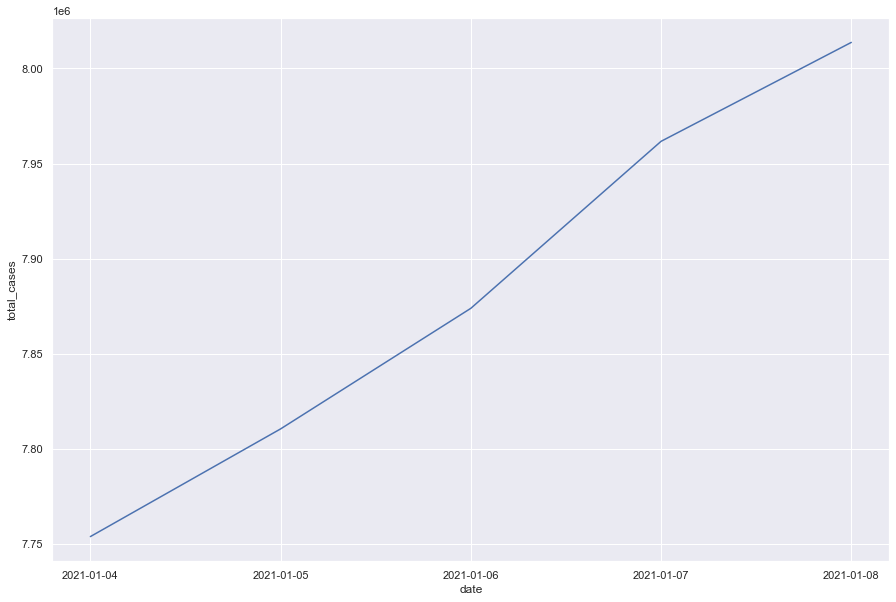

In [22]:
# total cases last 5 days

sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=brazil_last_5_days)
plt.show()

In [23]:
# understanding cases of india,china and japan

india_japan_china=covid[(covid["location"]=="India") | (covid["location"]=="China") | (covid["location"]=="Japan")]

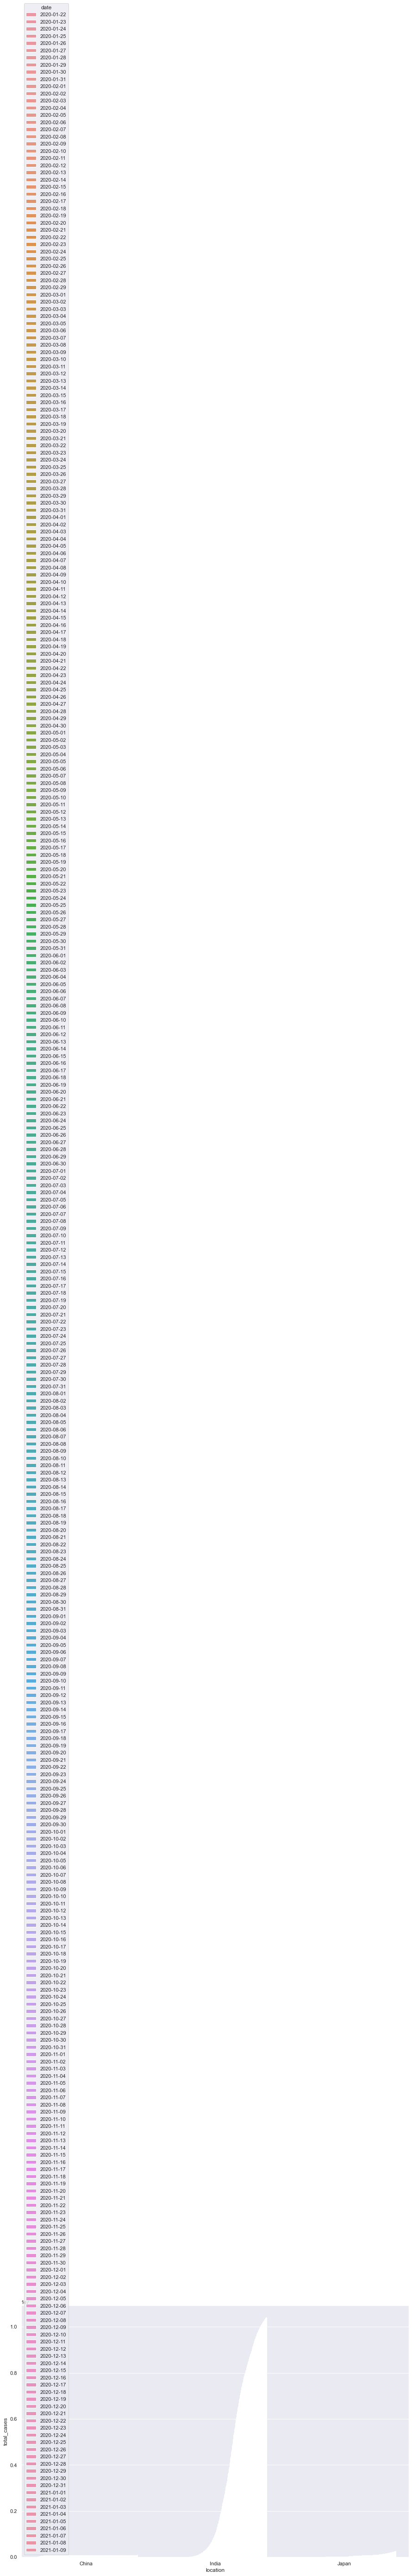

In [24]:
# total cases 

sns.set(rc={"figure.figsize":(15,10)})
sns.barplot(x="location",y="total_cases",data=india_japan_china,hue="date")
plt.show()

In [25]:
# understanding cases of germany and spain


germany_spain=covid[(covid["location"]=="Germany") | (covid["location"]=="Spain")]

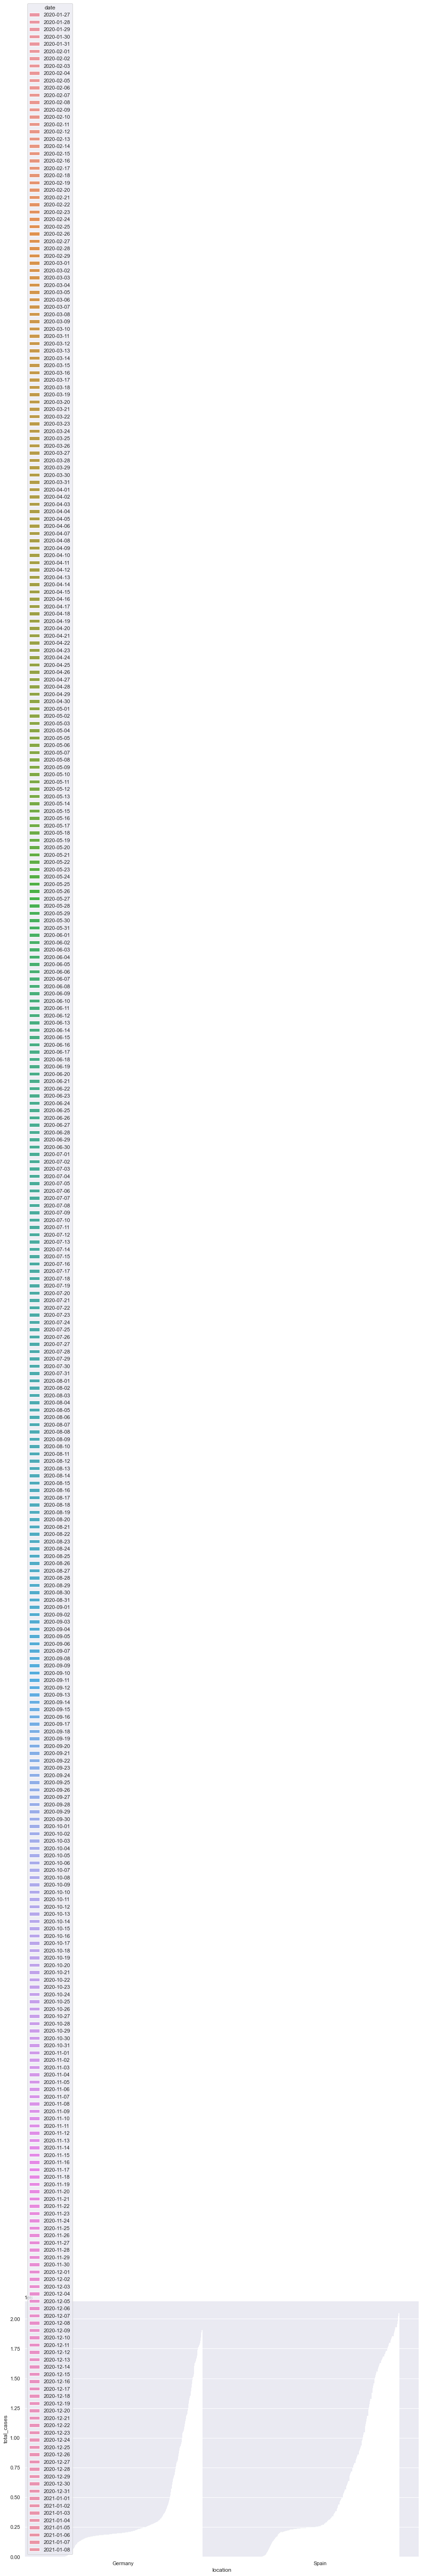

In [26]:
# total cases 

sns.set(rc={"figure.figsize":(15,10)})
sns.barplot(x="location",y="total_cases",data=germany_spain,hue="date")
plt.show()

In [27]:
# getting latset data

last_day_cases=covid[(covid["date"]=="2020-12-18")]
last_day_cases

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
298,AFG,Asia,Afghanistan,2020-12-18,49621.0,243.0,215.000,2030.0,5.0,12.143,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.498
604,ALB,Europe,Albania,2020-12-18,52004.0,580.0,734.429,1066.0,11.0,12.714,...,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.785
923,DZA,Africa,Algeria,2020-12-18,94371.0,438.0,464.286,2647.0,7.0,10.286,...,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.754
1236,AND,Europe,Andorra,2020-12-18,7519.0,53.0,40.429,80.0,1.0,0.286,...,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.858
1531,AGO,Africa,Angola,2020-12-18,16562.0,78.0,71.571,384.0,2.0,2.714,...,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57705,VNM,Asia,Vietnam,2020-12-18,1410.0,3.0,2.714,35.0,0.0,0.000,...,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.694
58058,OWID_WRL,NaN,World,2020-12-18,75684235.0,717468.0,644126.429,1675076.0,12630.0,11422.714,...,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,NaN
58334,YEM,Asia,Yemen,2020-12-18,2087.0,0.0,0.714,606.0,0.0,0.000,...,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.452
58631,ZMB,Africa,Zambia,2020-12-18,18575.0,71.0,59.143,373.0,4.0,1.143,...,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.588


In [28]:
# sorting date w.r.t to total cases

max_cases_country=last_day_cases.sort_values(by="total_cases",ascending=False)
max_cases_country

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
58058,OWID_WRL,NaN,World,2020-12-18,75684235.0,717468.0,644126.429,1675076.0,12630.0,11422.714,...,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,NaN
56081,USA,North America,United States,2020-12-18,17470717.0,249524.0,219431.571,313824.0,2806.0,2576.429,...,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.924
24105,IND,Asia,India,2020-12-18,10004599.0,25152.0,25403.429,145136.0,347.0,358.286,...,6426.674,21.2,282.280,10.39,1.900,20.600,59.550,0.530,69.66,0.640
7506,BRA,South America,Brazil,2020-12-18,7162978.0,52544.0,46678.714,185650.0,823.0,744.714,...,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88,0.759
43645,RUS,Europe,Russia,2020-12-18,2764843.0,28116.0,27217.714,49170.0,602.0,542.857,...,24765.954,0.1,431.297,6.18,23.400,58.300,NaN,8.050,72.58,0.816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57052,VAT,Europe,Vatican,2020-12-18,27.0,0.0,0.000,NaN,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
48077,SLB,Oceania,Solomon Islands,2020-12-18,17.0,0.0,0.000,NaN,NaN,0.000,...,2205.923,25.1,459.780,18.68,NaN,NaN,35.890,1.400,73.00,0.546
33579,MHL,Oceania,Marshall Islands,2020-12-18,4.0,0.0,0.000,NaN,NaN,0.000,...,3819.202,NaN,557.793,30.53,NaN,NaN,82.502,2.700,73.70,0.708
44890,WSM,Oceania,Samoa,2020-12-18,2.0,0.0,0.000,NaN,NaN,0.000,...,6021.557,NaN,348.977,9.21,16.700,38.100,NaN,NaN,73.32,0.713


In [29]:
# top 5 countries with maximum case
max_cases_country[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
56081,USA,North America,United States,2020-12-18,17470717.0,249524.0,219431.571,313824.0,2806.0,2576.429,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
24105,IND,Asia,India,2020-12-18,10004599.0,25152.0,25403.429,145136.0,347.0,358.286,...,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.640
7506,BRA,South America,Brazil,2020-12-18,7162978.0,52544.0,46678.714,185650.0,823.0,744.714,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
43645,RUS,Europe,Russia,2020-12-18,2764843.0,28116.0,27217.714,49170.0,602.0,542.857,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.816
19058,FRA,Europe,France,2020-12-18,2499529.0,16005.0,13207.143,60345.0,612.0,381.857,...,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901


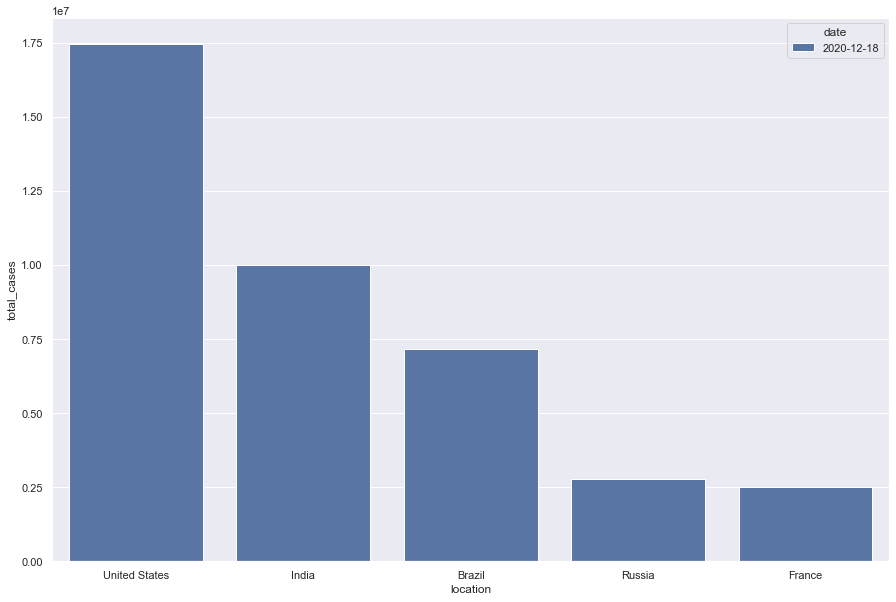

In [30]:
# plot on bar plot

sns.barplot(x="location",y="total_cases",data=max_cases_country[1:6],hue="date")
plt.show()